In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import vonmises
from scipy.stats import norm

In [339]:
def media_circular(theta):
    cos_bar=np.mean(np.cos(theta))
    sin_bar=np.mean(np.sin(theta))
    
    return(np.arctan2(sin_bar,cos_bar))

def dist_circular(theta1,theta2):
    return(np.pi-abs(np.pi-abs(theta1-theta2)))
def cGaussian(d,n,rho,r):
    return(rho**2+(1-n-rho**2)*np.exp(-3*d/r))
def cExponential(d,n,rho,r):
    return(rho**2+(1-n-rho**2)*np.exp(-3*(d/r)**2))
def cSpherical(d,n,rho,r):
    t=[]
    for i in d:
        if(i<=r):
            t.append(1-n-(1-n-rho**2)*(3/2*(i/r)-1/2*(i/r)**3))
        else:
            t.append(rho**2)

    return(np.array(t))


In [159]:
r = vonmises.rvs(5, size=1000)

In [350]:
from gstools import SRF, Spherical

x=y = np.linspace(0,12,11)

model = Spherical(dim=2, var=2, len_scale=10)
srf = SRF(model)

In [351]:
field = srf.structured([x, y])

In [352]:
np.mean(field)

-0.1234865650977139

In [353]:
np.size(field)

121

In [421]:
f=vonmises.ppf(norm.cdf((field-np.mean(field))/np.std(field)),1)

In [456]:
X,Y = np.meshgrid(np.linspace(0,12,11),np.linspace(0,12,11))
X=np.reshape(X,(-1,121))[0]
Y=np.reshape(Y,(-1,121))[0]
f=np.reshape(f,(-1,121))[0]

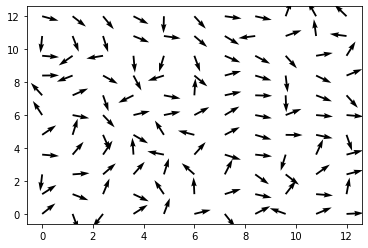

In [423]:
plt.quiver(X,Y,np.cos(f),np.sin(f))
plt.show()

In [424]:
trend=np.array([157, 141, 126, 113, 101, 90, 79, 67, 54, 40, 25, 152, 137, 123, 111, 100, 90, 80, 69, 57, 44, 30,
 147, 133, 120, 109, 99, 90, 81, 71, 60, 48, 35, 142, 129, 117, 107, 98, 90, 82, 73, 63, 52, 40,
 137, 125, 114, 105, 97, 90, 83, 75, 66, 56, 45, 132, 121, 111, 103, 96, 90, 84, 77, 69, 60, 50,
 127, 117, 108, 101, 95, 90, 85, 79, 72, 64, 55, 122, 113, 105, 99, 94, 90, 86, 81, 75, 68, 60,
 117, 109, 102, 97, 93, 90, 87, 83, 78, 72, 65, 112, 105, 99, 95, 92, 90, 88, 85, 81, 76, 70,
 107, 101, 96, 93, 91, 90, 89, 87, 84, 80, 75])*np.pi/180

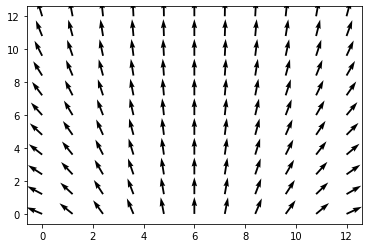

In [425]:
plt.quiver(X,Y,np.cos(trend),np.sin(trend))
plt.show()

In [426]:
Data=trend+f

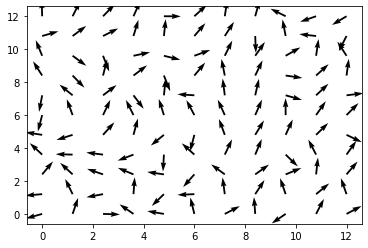

In [427]:
plt.quiver(X,Y,np.cos(Data),np.sin(Data))
plt.show()

In [428]:
def cosiengram(epsilon,data,X,Y):
    dx=max(X)-min(X)
    dy=max(Y)-min(Y)
    n=len(data)
    cosiengram=[]
    
    distances=np.linspace(epsilon,np.sqrt(dy**2+dx**2),len(data))
    for d in distances:
        cosines=[]
        for i in range(n):
            cx,cy=(X[i],Y[i])
            target = np.sqrt((X - cx)**2 + (Y - cy)**2)
            cosines.append(np.mean(np.cos(Data[i]-Data[target<=d])))
        cosiengram.append(np.mean(cosines))
    return(cosiengram,distances)

In [429]:
c,d=cosiengram(0.1,Data,X,Y)

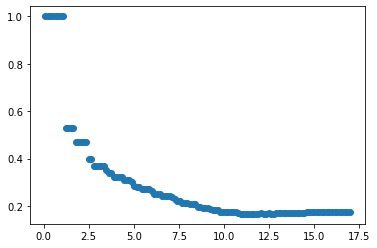

In [430]:
plt.scatter(d,c)

In [431]:
from scipy.optimize import curve_fit

In [432]:
poptG, pcov=curve_fit(cGaussian,d,c)
poptE, pcov=curve_fit(cExponential,d,c)
poptS, pcov=curve_fit(cSpherical,d,c)


C:\Users\57314\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


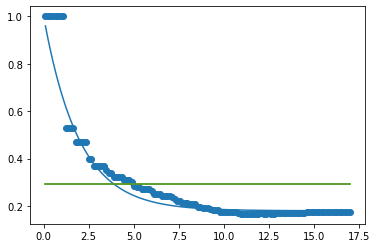

In [433]:
plt.plot(d,cGaussian(d,0,poptG[1],poptG[2]))
plt.plot(d,cExponential(d,0,poptE[1],poptE[2]))
plt.plot(d,cSpherical(d,0,poptS[1],poptS[2]))
plt.scatter(d,c)

In [434]:
def K(p,func,X,Y):
    K=np.identity(len(X))
    for i in range(1,len(X)):
        for j in range(i,len(X)):
            K[i,j]=func(np.sqrt((X[i]-X[j])**2+(Y[i]-Y[j])**2),0,p[1],p[2])
            K[j,i]=K[i,j]
    
    return(K)
        
    
def C(p,func,x,y,X,Y):
    c=[]
    for i in range(len(X)):
        c.append(func(np.sqrt((X[i]-x)**2+(Y[i]-y)**2),0,p[1],p[2]))
    return(c)

    

In [435]:
K(popt,cGaussian,X,Y)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.4999956 , ..., 0.1693523 , 0.16934769,
        0.16934488],
       [0.        , 0.4999956 , 1.        , ..., 0.16935938, 0.1693523 ,
        0.16934769],
       ...,
       [0.        , 0.1693523 , 0.16935938, ..., 1.        , 0.4999956 ,
        0.30096251],
       [0.        , 0.16934769, 0.1693523 , ..., 0.4999956 , 1.        ,
        0.4999956 ],
       [0.        , 0.16934488, 0.16934769, ..., 0.30096251, 0.4999956 ,
        1.        ]])

In [436]:
C(popt,cGaussian,5,5,X,Y)

[0.17298992498766722,
 0.1760370780260128,
 0.1803229082412097,
 0.1847742441806133,
 0.18717427412217552,
 0.18591984714727447,
 0.18188250635674144,
 0.17735234911809025,
 0.17385419327074017,
 0.17166713125928604,
 0.17046767372212512,
 0.1760370780260128,
 0.18276499666212995,
 0.19357706098284425,
 0.20644037726006054,
 0.21409717111102344,
 0.21002990283458783,
 0.19789179514563804,
 0.18591984714727447,
 0.1778591480255308,
 0.17339480831572973,
 0.17117850002066026,
 0.1803229082412097,
 0.19357706098284425,
 0.21872949715622636,
 0.25543714574260606,
 0.28156654550202453,
 0.2672342023884209,
 0.23015385587952158,
 0.20042424928439218,
 0.18372597427564202,
 0.1756577703434778,
 0.1720331692838714,
 0.1847742441806133,
 0.20644037726006054,
 0.25543714574260606,
 0.35105029631404466,
 0.449859481620062,
 0.3910919225112852,
 0.28156654550202453,
 0.21872949715622636,
 0.19006443011937205,
 0.1778591480255308,
 0.17280553604655172,
 0.18717427412217552,
 0.21409717111102344,
 0

In [437]:
h_d=np.cos(Data)
v_d=np.sin(Data)
K_1c=np.matmul(np.linalg.inv(K(popt,cGaussian,X,Y)),C(popt,cGaussian,5,5,X,Y))



In [438]:
np.matmul(h_d,K_1c)

-0.7917150503533705

In [439]:
np.matmul(v_d,K_1c)

-0.43426335987697273

In [440]:
def krigCirc(x_new,y_new,p,func,X,Y,Data):
    n_new=len(x_new)
    cosine=[]
    sine=[]
    h_d=np.cos(Data)
    v_d=np.sin(Data)
    K_inverse=np.linalg.inv(K(p,func,X,Y))
    for i in range(n_new):
        K_1c=np.matmul(K_inverse,C(p,func,x_new[i],y_new[i],X,Y))
        cosine.append(np.matmul(h_d,K_1c))
        sine.append(np.matmul(v_d,K_1c))
    return(cosine,sine)
        

In [463]:
X_new,Y_new = np.meshgrid(np.linspace(0,12,30),np.linspace(0,12,30))
X_new=np.reshape(X_new,(-1,900))[0]
Y_new=np.reshape(Y_new,(-1,900))[0]

In [464]:
h,v=krigCirc(X_new,Y_new,popt,cGaussian,X,Y,Data)

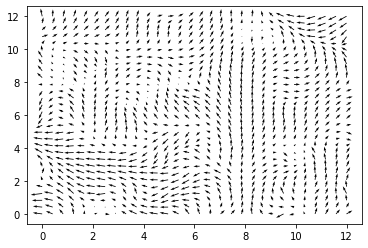

In [465]:
plt.quiver(X_new,Y_new,h,v)
plt.show()

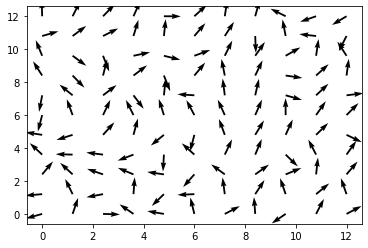

In [466]:
plt.quiver(X,Y,np.cos(Data),np.sin(Data))
plt.show()